In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import html
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Import Dataset
#pd.set_option('display.max_colwidth', None)
df = pd.read_csv('/content/gdrive/My Drive/PhD/Program_Doc/Assignment/Project_Dataset/Cleaned_Neg.csv')
print(len(df.index))
df.head()

18390


,username,author_location,text,created_at,Sentiment,compound,label,is_neg,is_neutral,is_pos
0,shalomegrace1,NaN,Here's the war criminal pushing #vaccinepasspo...,2021-02-14 23:19:49+00:00,negative,-0.8399,-1.0,1,0,0
1,boomsbusts,@j0nathandavis for mkts/fin,"The sinister, Huxlean background to #DigitalPa...",2021-02-14 23:19:33+00:00,negative,-0.5994,-1.0,1,0,0
2,Artec7793,"California, USA",The agenda is obvious for those with eyes to s...,2021-02-14 23:12:18+00:00,negative,-0.5719,-1.0,1,0,0
3,paragonlink,Éire,Love the idea of losing our basic human rights...,2021-02-14 23:10:19+00:00,negative,-0.4871,-1.0,1,0,0
4,midgard_misfit,Planet Designation: Earth-666,The agenda is obvious for those with eyes to s...,2021-02-14 23:10:18+00:00,negative,-0.5719,-1.0,1,0,0


In [ ]:
data.shape

(40576, 10)

In [ ]:
# Delete all rows with label "positive"
#df = data[data.Sentiment != "positive"]

In [ ]:
#Save new data to file
#df.to_csv('/content/gdrive/My Drive/PhD/Program_Doc/Assignment/Project_Dataset/Cleaned_Neg.csv', encoding='utf-8', index=False)

In [ ]:
#Clean Tweets
def cleanUpTweet(text):
  # Remove mentions
  text = re.sub(r'@[A-Za-z0-9_]+','',str(text))
  # Remove hashtags
  text = re.sub(r'#@[A-Za-z0-9_]+','',str(text))
  # Remove retweets 
  text = re.sub(r'RT : ', '', str(text))
  # Remove URLs
  text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', str(text))
  #remove strange characters
  text = re.sub(r'ðŸ™', '', str(text))
  #remove amp 
  text = re.sub(r'&amp;', '', str(text))
  # Remove new lines
  text = re.sub(r'\n', '', str(text))
  return text

In [ ]:

df.text = df['text'].apply(cleanUpTweet)
df.head()  


,username,author_location,text,created_at,Sentiment,compound,label,is_neg,is_neutral,is_pos
0,shalomegrace1,NaN,Here's the war criminal pushing #vaccinepasspo...,2021-02-14 23:19:49+00:00,negative,-0.8399,-1.0,1,0,0
1,boomsbusts,@j0nathandavis for mkts/fin,"The sinister, Huxlean background to #DigitalPa...",2021-02-14 23:19:33+00:00,negative,-0.5994,-1.0,1,0,0
2,Artec7793,"California, USA",The agenda is obvious for those with eyes to s...,2021-02-14 23:12:18+00:00,negative,-0.5719,-1.0,1,0,0
3,paragonlink,Éire,Love the idea of losing our basic human rights...,2021-02-14 23:10:19+00:00,negative,-0.4871,-1.0,1,0,0
4,midgard_misfit,Planet Designation: Earth-666,The agenda is obvious for those with eyes to s...,2021-02-14 23:10:18+00:00,negative,-0.5719,-1.0,1,0,0


In [ ]:
#All LowerCase
df['text']= df['text'].str.lower()
df.head()  

,username,author_location,text,created_at,Sentiment,compound,label,is_neg,is_neutral,is_pos
0,shalomegrace1,NaN,here's the war criminal pushing #vaccinepasspo...,2021-02-14 23:19:49+00:00,negative,-0.8399,-1.0,1,0,0
1,boomsbusts,@j0nathandavis for mkts/fin,"the sinister, huxlean background to #digitalpa...",2021-02-14 23:19:33+00:00,negative,-0.5994,-1.0,1,0,0
2,Artec7793,"California, USA",the agenda is obvious for those with eyes to s...,2021-02-14 23:12:18+00:00,negative,-0.5719,-1.0,1,0,0
3,paragonlink,Éire,love the idea of losing our basic human rights...,2021-02-14 23:10:19+00:00,negative,-0.4871,-1.0,1,0,0
4,midgard_misfit,Planet Designation: Earth-666,the agenda is obvious for those with eyes to s...,2021-02-14 23:10:18+00:00,negative,-0.5719,-1.0,1,0,0


In [ ]:
#Removing Punctuation
df['Text_punc'] = df['text'].str.replace('[^\w\s]','')
df.head()

,username,author_location,text,created_at,Sentiment,compound,label,is_neg,is_neutral,is_pos,Text_punc
0,shalomegrace1,NaN,here's the war criminal pushing #vaccinepasspo...,2021-02-14 23:19:49+00:00,negative,-0.8399,-1.0,1,0,0,heres the war criminal pushing vaccinepassport...
1,boomsbusts,@j0nathandavis for mkts/fin,"the sinister, huxlean background to #digitalpa...",2021-02-14 23:19:33+00:00,negative,-0.5994,-1.0,1,0,0,the sinister huxlean background to digitalpass...
2,Artec7793,"California, USA",the agenda is obvious for those with eyes to s...,2021-02-14 23:12:18+00:00,negative,-0.5719,-1.0,1,0,0,the agenda is obvious for those with eyes to s...
3,paragonlink,Éire,love the idea of losing our basic human rights...,2021-02-14 23:10:19+00:00,negative,-0.4871,-1.0,1,0,0,love the idea of losing our basic human rights...
4,midgard_misfit,Planet Designation: Earth-666,the agenda is obvious for those with eyes to s...,2021-02-14 23:10:18+00:00,negative,-0.5719,-1.0,1,0,0,the agenda is obvious for those with eyes to s...


In [ ]:
#Removal of stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
#stop.append("covid vaccine")
#stop.append("covid19 vaccine")
df['Text_stop']  = df['Text_punc'] .apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,username,author_location,text,created_at,Sentiment,compound,label,is_neg,is_neutral,is_pos,Text_punc,Text_stop
0,shalomegrace1,NaN,here's the war criminal pushing #vaccinepasspo...,2021-02-14 23:19:49+00:00,negative,-0.8399,-1.0,1,0,0,heres the war criminal pushing vaccinepassport...,heres war criminal pushing vaccinepassports ev...
1,boomsbusts,@j0nathandavis for mkts/fin,"the sinister, huxlean background to #digitalpa...",2021-02-14 23:19:33+00:00,negative,-0.5994,-1.0,1,0,0,the sinister huxlean background to digitalpass...,sinister huxlean background digitalpassportsva...
2,Artec7793,"California, USA",the agenda is obvious for those with eyes to s...,2021-02-14 23:12:18+00:00,negative,-0.5719,-1.0,1,0,0,the agenda is obvious for those with eyes to s...,agenda obvious eyes see check date hate right ...
3,paragonlink,Éire,love the idea of losing our basic human rights...,2021-02-14 23:10:19+00:00,negative,-0.4871,-1.0,1,0,0,love the idea of losing our basic human rights...,love idea losing basic human rights twat go ha...
4,midgard_misfit,Planet Designation: Earth-666,the agenda is obvious for those with eyes to s...,2021-02-14 23:10:18+00:00,negative,-0.5719,-1.0,1,0,0,the agenda is obvious for those with eyes to s...,agenda obvious eyes see check date hate right ...


In [ ]:
#Tokenization of Tweets
import textblob           
from textblob import TextBlob
def tokenization(text):
    text = re.split('\W+', text)
    return text
df['Text_tokenized'] = df['Text_stop'].apply(lambda x: tokenization(x.lower()))
df[['text', 'Text_punc', 'Text_stop', 'Text_tokenized']][0:9]

,text,Text_punc,Text_stop,Text_tokenized
0,here's the war criminal pushing #vaccinepasspo...,heres the war criminal pushing vaccinepassport...,heres war criminal pushing vaccinepassports ev...,"[heres, war, criminal, pushing, vaccinepasspor..."
1,"the sinister, huxlean background to #digitalpa...",the sinister huxlean background to digitalpass...,sinister huxlean background digitalpassportsva...,"[sinister, huxlean, background, digitalpasspor..."
2,the agenda is obvious for those with eyes to s...,the agenda is obvious for those with eyes to s...,agenda obvious eyes see check date hate right ...,"[agenda, obvious, eyes, see, check, date, hate..."
3,love the idea of losing our basic human rights...,love the idea of losing our basic human rights...,love idea losing basic human rights twat go ha...,"[love, idea, losing, basic, human, rights, twa..."
4,the agenda is obvious for those with eyes to s...,the agenda is obvious for those with eyes to s...,agenda obvious eyes see check date hate right ...,"[agenda, obvious, eyes, see, check, date, hate..."
5,#vaccinepassports = white-collar crime,vaccinepassports whitecollar crime,vaccinepassports whitecollar crime,"[vaccinepassports, whitecollar, crime]"
6,#vaccinepassports = white-collar crime,vaccinepassports whitecollar crime,vaccinepassports whitecollar crime,"[vaccinepassports, whitecollar, crime]"
7,some people will make half a dozen changes to ...,some people will make half a dozen changes to ...,people make half dozen changes food order rest...,"[people, make, half, dozen, changes, food, ord..."
8,this is why we have such a hard line against ...,this is why we have such a hard line against ...,hard line vaccinepassports immunitypassports c...,"[hard, line, vaccinepassports, immunitypasspor..."


In [ ]:
#Lemmatization is a more effective option than stemming because it converts the word into its root word, 
#rather than just stripping the suffices.
#nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Text_lemmatized'] = df['Text_tokenized'].apply(lambda x: lemmatizer(x))
df[['text', 'Text_punc', 'Text_tokenized','Text_stop','Text_lemmatized']][0:9]

,text,Text_punc,Text_tokenized,Text_stop,Text_lemmatized
0,here's the war criminal pushing #vaccinepasspo...,heres the war criminal pushing vaccinepassport...,"[heres, war, criminal, pushing, vaccinepasspor...",heres war criminal pushing vaccinepassports ev...,"[here, war, criminal, pushing, vaccinepassport..."
1,"the sinister, huxlean background to #digitalpa...",the sinister huxlean background to digitalpass...,"[sinister, huxlean, background, digitalpasspor...",sinister huxlean background digitalpassportsva...,"[sinister, huxlean, background, digitalpasspor..."
2,the agenda is obvious for those with eyes to s...,the agenda is obvious for those with eyes to s...,"[agenda, obvious, eyes, see, check, date, hate...",agenda obvious eyes see check date hate right ...,"[agenda, obvious, eye, see, check, date, hate,..."
3,love the idea of losing our basic human rights...,love the idea of losing our basic human rights...,"[love, idea, losing, basic, human, rights, twa...",love idea losing basic human rights twat go ha...,"[love, idea, losing, basic, human, right, twat..."
4,the agenda is obvious for those with eyes to s...,the agenda is obvious for those with eyes to s...,"[agenda, obvious, eyes, see, check, date, hate...",agenda obvious eyes see check date hate right ...,"[agenda, obvious, eye, see, check, date, hate,..."
5,#vaccinepassports = white-collar crime,vaccinepassports whitecollar crime,"[vaccinepassports, whitecollar, crime]",vaccinepassports whitecollar crime,"[vaccinepassports, whitecollar, crime]"
6,#vaccinepassports = white-collar crime,vaccinepassports whitecollar crime,"[vaccinepassports, whitecollar, crime]",vaccinepassports whitecollar crime,"[vaccinepassports, whitecollar, crime]"
7,some people will make half a dozen changes to ...,some people will make half a dozen changes to ...,"[people, make, half, dozen, changes, food, ord...",people make half dozen changes food order rest...,"[people, make, half, dozen, change, food, orde..."
8,this is why we have such a hard line against ...,this is why we have such a hard line against ...,"[hard, line, vaccinepassports, immunitypasspor...",hard line vaccinepassports immunitypassports c...,"[hard, line, vaccinepassports, immunitypasspor..."


In [ ]:
#Save new data to file
df.to_csv('/content/gdrive/My Drive/PhD/Program_Doc/Assignment/Project_Dataset/Cleaned_Neg1.csv', encoding='utf-8', index=False)

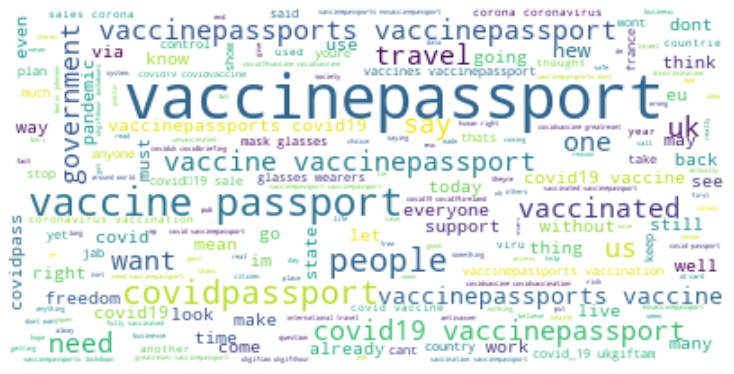

In [ ]:
# Import the wordcloud library
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(data['Text_stop'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
#wordcloud.to_image()
# plot the WordCloud image                        
plt.figure(figsize = (10, 8), edgecolor = 'k') 
plt.imshow(wordcloud,interpolation = 'bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('/content/gdrive/My Drive/PhD/Program_Doc/Assignment/Project_Dataset/GoodWordCloud.png')
plt.show()

In [ ]:
#Save new data to file
data.to_csv('/content/gdrive/My Drive/PhD/Program_Doc/Assignment/Project_Dataset/Cleaned_Dataset.csv', encoding='utf-8', index=False)

In [ ]:
#Load new dataset
data1 = pd.read_csv('/content/gdrive/My Drive/PhD/Program_Doc/Assignment/Project_Dataset/Cleaned_Dataset.csv')
data1.head()

,username,author_location,text,created_at,Text_punc,Text_stop,Text_tokenized,Text_lemmatized
0,Paul_BQQM_UK,NaN,"nadhim zahawi: ""we are not looking at immunit...",2021-02-14 23:55:34+00:00,nadhim zahawi we are not looking at immunity ...,nadhim zahawi looking immunity passports 8th d...,"['nadhim', 'zahawi', 'looking', 'immunity', 'p...","['nadhim', 'zahawi', 'looking', 'immunity', 'p..."
1,cloudslicer,NaN,this creeping extension of social control and ...,2021-02-14 23:49:18+00:00,this creeping extension of social control and ...,creeping extension social control power state ...,"['creeping', 'extension', 'social', 'control',...","['creeping', 'extension', 'social', 'control',..."
2,JohnStauber,Citizen-at-Large,#vaccinepassports' could be used inside the un...,2021-02-14 23:45:25+00:00,vaccinepassports could be used inside the unit...,vaccinepassports could used inside united kingdom,"['vaccinepassports', 'could', 'used', 'inside'...","['vaccinepassports', 'could', 'used', 'inside'..."
3,SRL_82,"Melton Mowbray, England",the uk should take the lead in creating a glob...,2021-02-14 23:43:01+00:00,the uk should take the lead in creating a glob...,uk take lead creating global coronavirus vacci...,"['uk', 'take', 'lead', 'creating', 'global', '...","['uk', 'take', 'lead', 'creating', 'global', '..."
4,flackster,Middle-earth,"🏁100,000 signatures received - thank you! 🏁🙏we...",2021-02-14 23:28:10+00:00,100000 signatures received thank you were gra...,100000 signatures received thank grateful ever...,"['100000', 'signatures', 'received', 'thank', ...","['100000', 'signature', 'received', 'thank', '..."
